In [19]:
import os
import random

In [20]:
BASE_DATASET_PATH = './dataset'
TRAIN_DATASET_PATH = BASE_DATASET_PATH + '/Training'
TEST_DATASET_PATH = BASE_DATASET_PATH + '/Test'

In [21]:
def load_images(path: str) -> dict:
    images = {}
    
    for folder in os.listdir(path):
        category = folder.split()[0]
        folder = path + '/' + folder
        if category not in images.keys(): images[category] = []
        images[category].append([folder + '/' + file for file in os.listdir(folder)])
        
    return images

In [22]:
train_images = load_images(TRAIN_DATASET_PATH)
test_images = load_images(TEST_DATASET_PATH)

# Debugging information
print('Train Dataset')
print({ category: sum([len(ims) for ims in images]) for category, images in train_images.items() })

print()

print('Test Dataset')
print({ category: sum([len(ims) for ims in images]) for category, images in test_images.items() })

Train Dataset
{'Apple': 6404, 'Tomato': 5103, 'Orange': 479, 'Cocos': 490, 'Kiwi': 466, 'Lemon': 982}

Test Dataset
{'Apple': 2134, 'Tomato': 1707, 'Orange': 160, 'Cocos': 166, 'Kiwi': 156, 'Lemon': 330}


In [23]:
# Balance training dataset
max_number_collections = max([ len(collections) for collections in train_images.values() ])
min_number_samples = min([ sum([len(collection) for collection in collections]) for collections in train_images.values() ])
train_images_balanced = { category: [ image for collection in collections for image in random.sample(collection, int(min_number_samples/len(collections))) ] for category, collections in train_images.items() }
train_images_balanced = { category: images + random.sample([image for collection in train_images[category] for image in collection if image not in train_images_balanced[category]], min_number_samples - len(train_images_balanced[category])) for category, images in train_images_balanced.items() }

# Debugging information
print('Train Dataset')
print({ category: len(set(images)) for category, images in train_images_balanced.items() })

Train Dataset
{'Apple': 466, 'Tomato': 466, 'Orange': 466, 'Cocos': 466, 'Kiwi': 466, 'Lemon': 466}


In [24]:
# Format datasets
train_dataset = train_images_balanced
test_dataset = { category: [ image for collection in collections for image in collection ] for category, collections in test_images.items() }

# Debugging information
print('Train Dataset')
print({ category: len(images) for category, images in train_dataset.items() })

print()

print('Test Dataset')
print({ category: len(images) for category, images in test_dataset.items() })

Train Dataset
{'Apple': 466, 'Tomato': 466, 'Orange': 466, 'Cocos': 466, 'Kiwi': 466, 'Lemon': 466}

Test Dataset
{'Apple': 2134, 'Tomato': 1707, 'Orange': 160, 'Cocos': 166, 'Kiwi': 156, 'Lemon': 330}


In [28]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [26]:
def load_image_files(data):
    return { category: [ mpimg.imread(image) for image in images ] for category, images in data.items() }

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)


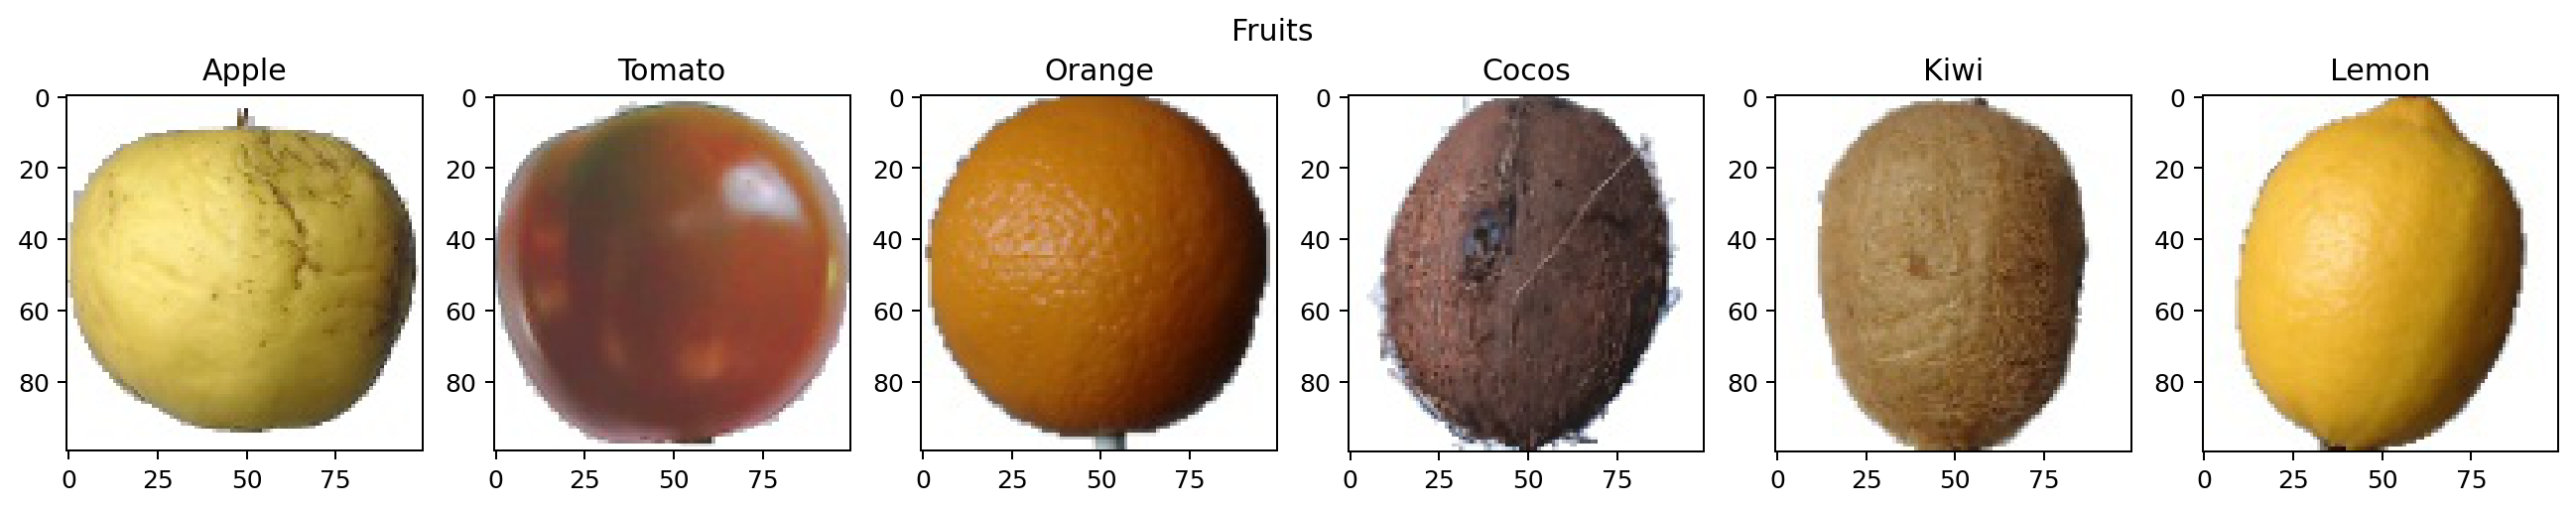

In [43]:
train_dataset_images = load_image_files(train_dataset)
test_dataset_images = load_image_files(test_dataset)

# Debug Training Dataset Information
categories = list(train_dataset_images.keys())

fig, axs = plt.subplots(1, len(categories), figsize=(18, 3), dpi=180)
fig.suptitle('Fruits')

for idx in range(len(categories)):
    category = categories[idx]
    print(train_dataset_images[category][0].shape)
    axs[idx].imshow(train_dataset_images[category][0])
    axs[idx].set_title(category)

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler    

In [66]:
def decomposition(dataset):
    X_dataset = []
    y_dataset = []
    
    for category, images in dataset.items():
        X_dataset.extend(images)
        y_dataset.extend([category for _ in range(len(images))])
    
    scaler = StandardScaler()
    X_dataset = scaler.fit_transform([i.flatten() for i in X_dataset])
    
    return X_dataset, y_dataset

In [83]:
X_train, y_train = decomposition(train_dataset_images)
X_test, y_test = decomposition(test_dataset_images)

# Debugging info
print("Train data")
print("X length: ", len(X_train))
print("y length: ", len(y_train))

print()

print("Test data")
print("X length: ", len(X_test))
print("y length: ", len(y_test))

Train data
X length:  2796
y length:  2796

Test data
X length:  4653
y length:  4653


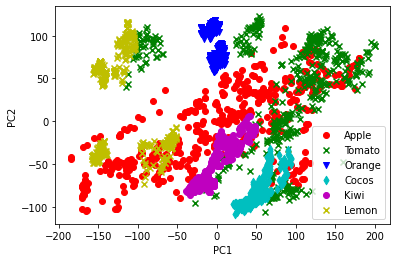

In [99]:
pca = PCA(n_components=2)
dataIn2D = pca.fit_transform(X_train)

colors = {'Apple': 'r', 'Tomato': 'g', 'Orange': 'b', 'Cocos': 'c', 'Kiwi': 'm', 'Lemon': 'y'}
markers = {'Apple': 'o', 'Tomato': 'x', 'Orange': 'v', 'Cocos': 'd', 'Kiwi': 'o', 'Lemon': 'x'}

categories = list(train_dataset_images.keys())

for i in range(len(categories)):
    start = i*len(train_dataset_images[categories[i]])
    end = start+len(train_dataset_images[categories[i]])
    plt.scatter(dataIn2D[start:end,0], dataIn2D[start:end,1], color=colors[categories[i]], marker=markers[categories[i]], label=categories[i])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

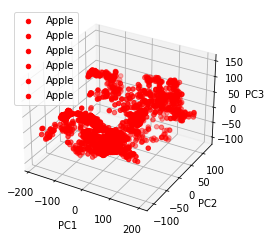

In [102]:
pca = PCA(n_components=3)
dataIn3D = pca.fit_transform(X_train)

colors = {'Apple': 'r', 'Tomato': 'g', 'Orange': 'b', 'Cocos': 'c', 'Kiwi': 'm', 'Lemon': 'y'}
markers = {'Apple': 'o', 'Tomato': 'x', 'Orange': 'v', 'Cocos': 'd', 'Kiwi': 'o', 'Lemon': 'x'}

categories = list(train_dataset_images.keys())
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(categories)):
    start = i*len(train_dataset_images[categories[i]])
    end = start+len(train_dataset_images[categories[i]])
    ax.scatter(dataIn3D[start:end,0], dataIn3D[start:end,1], dataIn3D[start:end,2], color=colors[y_train[i]], marker=markers[y_train[i]], label=y_train[i])

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
plt.legend()